In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el dataset

In [8]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/sprint_6/games.csv'

df = pd.read_csv(url)

In [9]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
def cols_names_lower(df):
  df.columns = [col.lower() for col in df.columns]
  return df

In [12]:
df = cols_names_lower(df)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Task
Perform exploratory data analysis on the dataset.

## Handle missing values

### Subtask:
Identify and address missing values in the dataset.


**Reasoning**:
Check for missing values in the dataframe and display the count for each column to understand the extent of missing data.



In [13]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


**Reasoning**:
Based on the missing value counts, the 'critic_score', 'user_score', and 'rating' columns have a significant number of missing values. Dropping these columns might be too aggressive as they could contain valuable information. The 'year_of_release' column has a relatively small number of missing values, which can be filled. The 'name' and 'genre' columns have only two missing values, which can be dropped without significant data loss. The remaining columns have no missing values. Therefore, the strategy will be to drop rows with missing 'name' and 'genre' values, fill missing 'year_of_release' values with the median, and keep the columns with many missing values for now as imputation strategies will depend on further analysis.



In [14]:
df.dropna(subset=['name', 'genre'], inplace=True)
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())
print(df.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


## Convert data types

### Subtask:
Convert columns to appropriate data types (e.g., 'year_of_release' to integer).


**Reasoning**:
Convert the 'year_of_release' column to integer, inspect the unique values in the 'user_score' column, and then convert 'user_score' to numeric.



In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)
print(df['user_score'].unique())
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df.info())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   

## Handle duplicates

### Subtask:
Check for and remove any duplicate rows.


**Reasoning**:
Check for and remove duplicate rows as per the instructions.



In [16]:
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


## Calculate total sales

### Subtask:
Create a new column for total sales across all regions.


**Reasoning**:
Sum the sales columns to create the total_sales column.



In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analyze sales by year

### Subtask:
Analyze sales distribution by year and identify the peak sales year.


**Reasoning**:
Group the data by year and calculate the sum of total sales, then sort and display the result.



In [18]:
sales_by_year = df.groupby('year_of_release')['total_sales'].sum().reset_index()
sales_by_year_sorted = sales_by_year.sort_values(by='total_sales', ascending=False)
display(sales_by_year_sorted)

,year_of_release,total_sales
27,2007,703.67
28,2008,671.50
29,2009,658.82
30,2010,590.13
26,2006,517.71
31,2011,507.58
25,2005,457.82
24,2004,418.68
22,2002,394.97
33,2013,361.24


**Reasoning**:
Visualize the total sales over the years using a line plot to show the trend and identify the peak sales year.



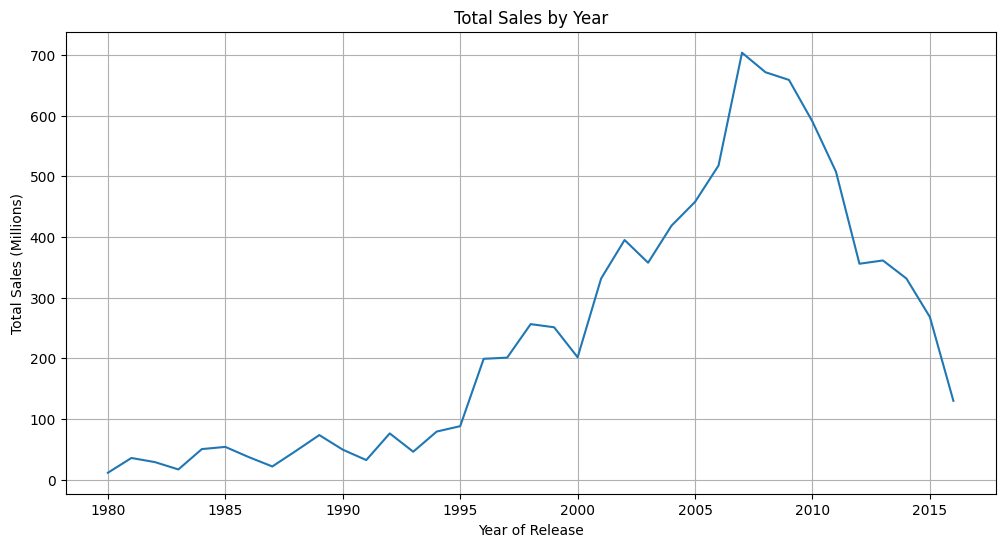

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='year_of_release', y='total_sales')
plt.title('Total Sales by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()

## Analyze sales by platform

### Subtask:
Analyze sales distribution by platform.


**Reasoning**:
Group the data by platform and sum the total sales, then sort the results and display the top platforms by sales.



In [20]:
sales_by_platform = df.groupby('platform')['total_sales'].sum().reset_index()
sales_by_platform_sorted = sales_by_platform.sort_values(by='total_sales', ascending=False)
display(sales_by_platform_sorted)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


**Reasoning**:
Create a bar plot to visualize the total sales by platform using the sorted data.



/tmp/ipython-input-3503855621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_platform_sorted, x='platform', y='total_sales', palette='viridis')


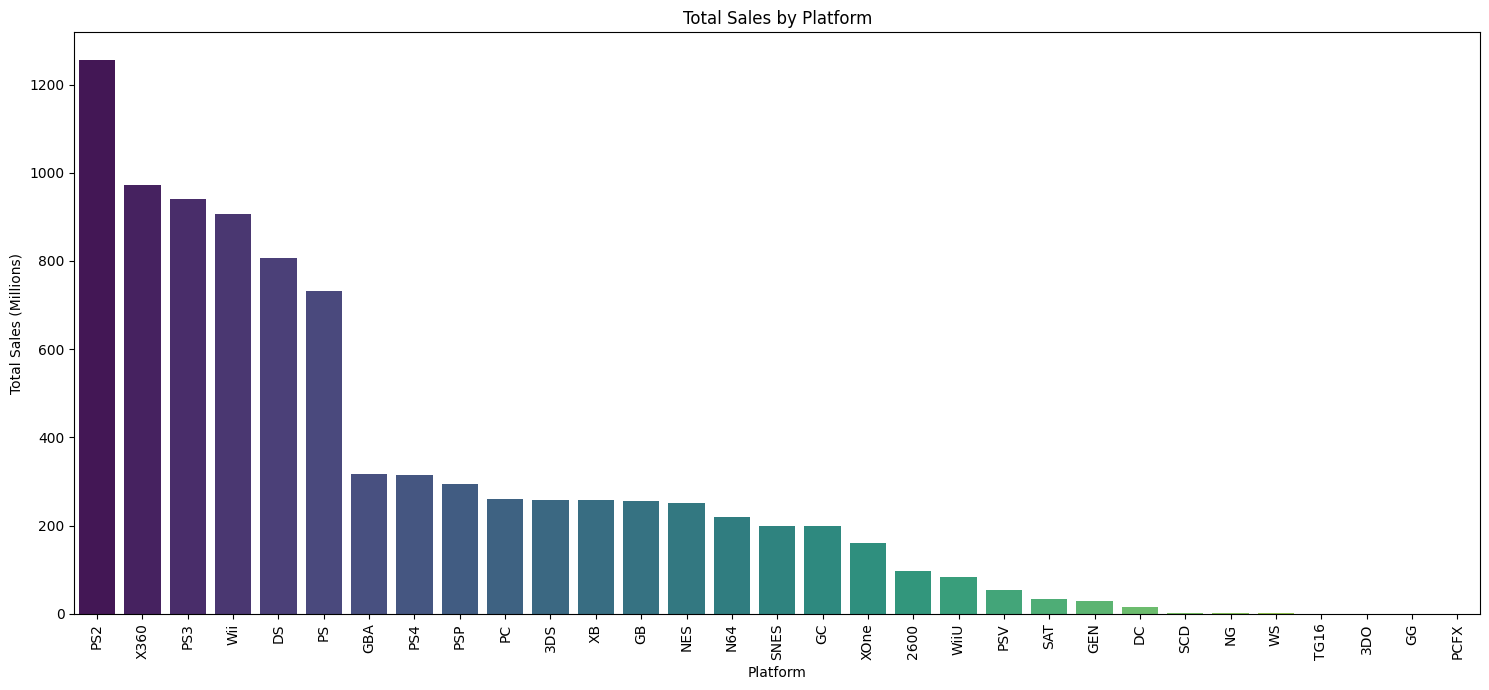

In [21]:
plt.figure(figsize=(15, 7))
sns.barplot(data=sales_by_platform_sorted, x='platform', y='total_sales', palette='viridis')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze sales by genre

### Subtask:
Analyze sales distribution by genre.


**Reasoning**:
Group the data by genre to calculate total sales and sort the results.



In [22]:
sales_by_genre = df.groupby('genre')['total_sales'].sum().reset_index()
sales_by_genre_sorted = sales_by_genre.sort_values(by='total_sales', ascending=False)
display(sales_by_genre_sorted)

,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


**Reasoning**:
Create a bar plot to visualize the total sales by genre.



/tmp/ipython-input-2965927635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_genre_sorted, x='genre', y='total_sales', palette='viridis')


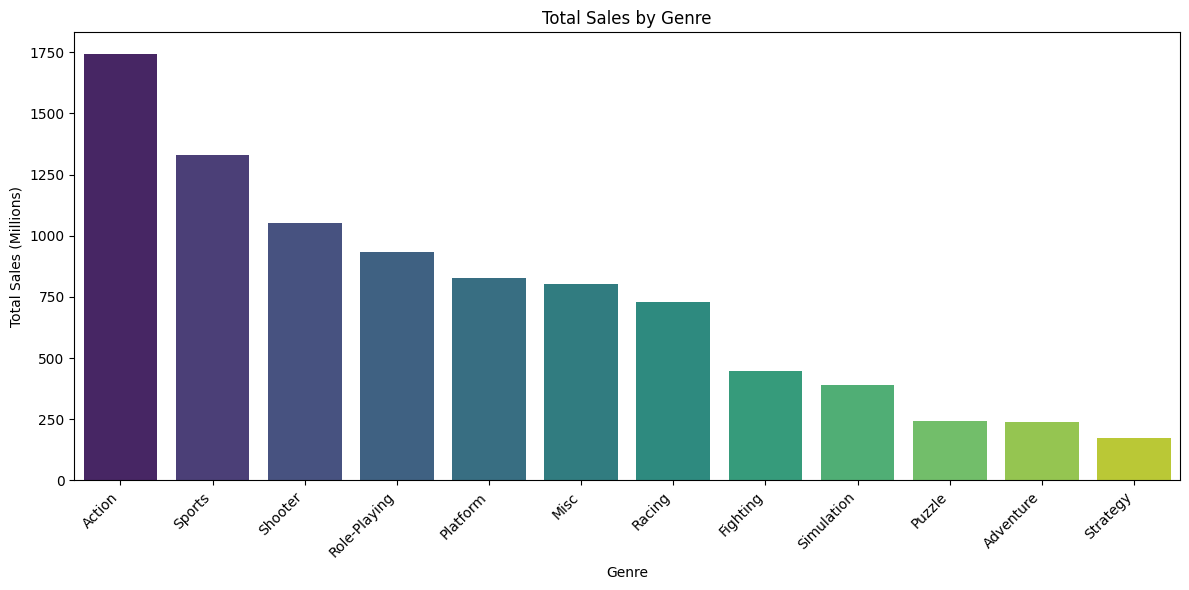

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_genre_sorted, x='genre', y='total_sales', palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze user and critic scores

### Subtask:
Analyze user and critic scores distributions and their relationship with sales.


**Reasoning**:
Create scatter plots to visualize the relationship between critic score and total sales, and user score and total sales.



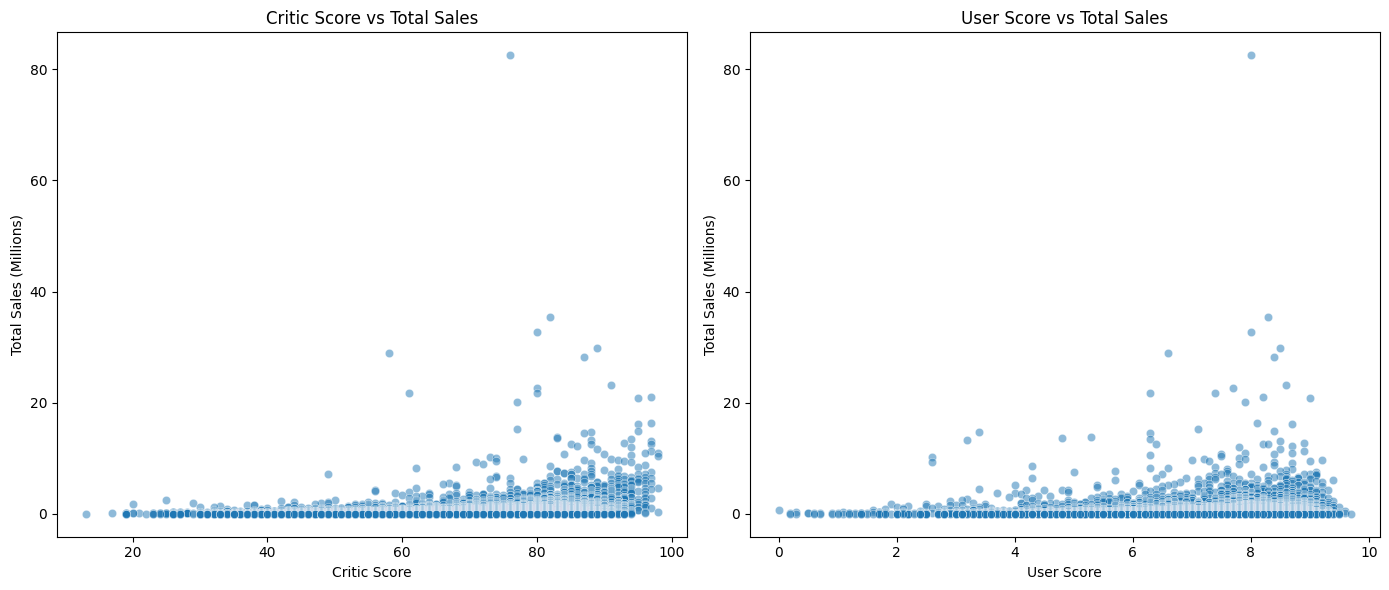

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='critic_score', y='total_sales', alpha=0.5)
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='user_score', y='total_sales', alpha=0.5)
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')

plt.tight_layout()
plt.show()

**Reasoning**:
Calculate the correlation coefficients between critic score and total sales, and user score and total sales, after dropping rows with missing values in those columns.



In [25]:
df_cleaned_scores = df.dropna(subset=['critic_score', 'user_score'])

critic_corr = df_cleaned_scores['critic_score'].corr(df_cleaned_scores['total_sales'])
user_corr = df_cleaned_scores['user_score'].corr(df_cleaned_scores['total_sales'])

print(f"Correlation between Critic Score and Total Sales: {critic_corr:.2f}")
print(f"Correlation between User Score and Total Sales: {user_corr:.2f}")

Correlation between Critic Score and Total Sales: 0.24
Correlation between User Score and Total Sales: 0.09


## Analyze rating

### Subtask:
Analyze the impact of ESRB ratings on sales.


**Reasoning**:
Group the dataframe by rating, calculate the sum of total sales, sort the results, and then visualize the sales by rating using a bar plot with appropriate labels and title.



,rating,total_sales
1,E,2435.52
7,T,1493.35
5,M,1473.79
2,E10+,655.60
4,K-A,4.32
0,AO,1.96
3,EC,1.75
6,RP,0.09


/tmp/ipython-input-403135878.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_rating_sorted, x='rating', y='total_sales', palette='viridis')


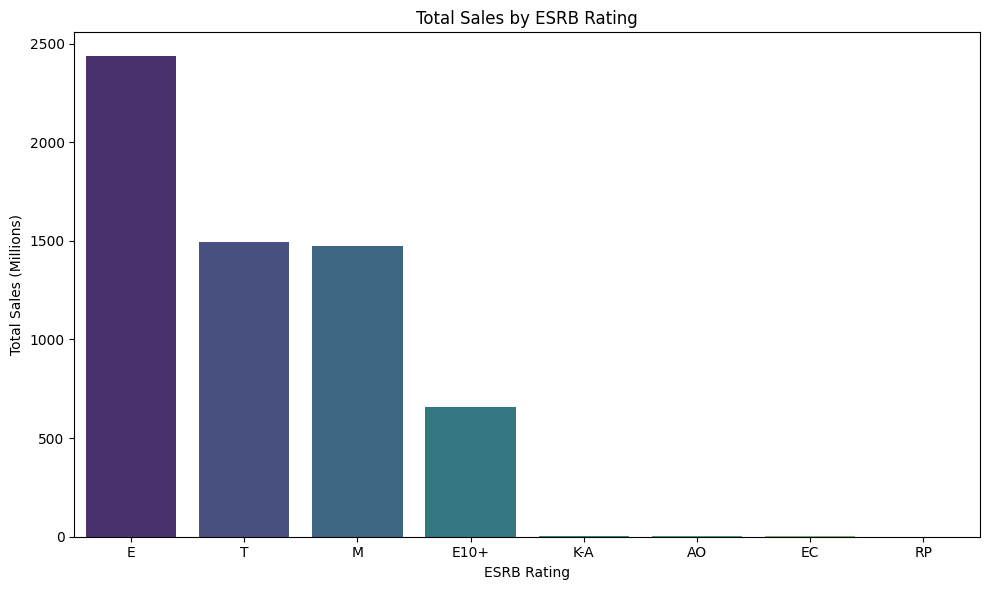

In [26]:
sales_by_rating = df.groupby('rating')['total_sales'].sum().reset_index()
sales_by_rating_sorted = sales_by_rating.sort_values(by='total_sales', ascending=False)
display(sales_by_rating_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_rating_sorted, x='rating', y='total_sales', palette='viridis')
plt.title('Total Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Initial data inspection revealed missing values in 'name', 'genre', 'year\_of\_release', 'critic\_score', 'user\_score', and 'rating' columns. Rows with missing 'name' and 'genre' were dropped, while missing 'year\_of\_release' values were imputed with the median. Missing values in 'critic\_score', 'user\_score', and 'rating' were kept for later handling.
*   The 'year\_of\_release' column was successfully converted to an integer data type, and the 'user\_score' column was converted to a numeric data type, with non-numeric values ('tbd') being coerced to `NaN`.
*   No duplicate rows were found in the dataset.
*   A new column, 'total\_sales', was created by summing sales from the 'na\_sales', 'eu\_sales', 'jp\_sales', and 'other\_sales' columns.
*   Analysis of sales by year showed that 2007 had the highest total sales, approximately \$703.67 million. The sales trend generally increased leading up to 2007 and then decreased in subsequent years.
*   Analysis of sales by platform identified PS2, X360, and PS3 as the top-selling platforms.
*   Analysis of sales by genre showed that Action, Sports, and Shooter were the top-selling genres, each with total sales exceeding \$1000 million. Strategy and Adventure genres had the lowest total sales.
*   A weak positive correlation was observed between critic scores and total sales (approximately 0.24), and a very weak positive correlation was observed between user scores and total sales (approximately 0.09). This indicates that while scores may have some influence, they are not the primary drivers of sales.
*   Analysis of sales by ESRB rating showed that 'E' (Everyone), 'T' (Teen), and 'M' (Mature) ratings were associated with the highest total sales.

### Insights or Next Steps

*   Investigate the reasons behind the sales decline after 2007, potentially exploring changes in the gaming industry, economic factors, or shifts in popular platforms.
*   Further analyze the columns with a high number of missing values ('critic\_score', 'user\_score', and 'rating') to determine the most appropriate imputation strategy or whether to exclude them from certain analyses.
